# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools_fp import MCSimulation
import requests
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Submit request and format output
btc_data = requests.get(btc_url).json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18566831,
   'total_supply': 18566831,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 18564.99,
     'volume_24h': 29806757749,
     'market_cap': 344678628764,
     'percentage_change_1h': 0.0260901385101584,
     'percentage_change_24h': 1.2459940158058,
     'percentage_change_7d': -1.55074743097065,
     'percent_change_1h': 0.0260901385101584,
     'percent_change_24h': 1.2459940158058,
     'percent_change_7d': -1.55074743097065},
    'CAD': {'price': 23811.456174,
     'volume_24h': 38230147488.8674,
     'market_cap': 442084809252.706,
     'percent_change_1h': 0.0260901385101584,
     'percent_change_24h': 1.2459940158058,
     'percent_change_7d': -1.55074743097065}},
   'last_updated': 1607558285}},
 'metadata': {'timestamp': 1607558285,
  'num_cryptocurrencies': 1406,
  'error': None}}

In [5]:
# Pull current USD BTC price
btc_usd_price = btc_data['data']['1']['quotes']['USD']['price']
btc_usd_price

18564.99

In [6]:
# Pull current CAD BTC price
btc_cad_price = btc_data['data']['1']['quotes']['CAD']['price']
btc_cad_price

23811.456174

In [7]:
eth_data = requests.get(eth_url).json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 113767489,
   'total_supply': 113767489,
   'max_supply': 0,
   'quotes': {'USD': {'price': 573.9,
     'volume_24h': 14024278560,
     'market_cap': 65276424697,
     'percentage_change_1h': -0.57228905165186,
     'percentage_change_24h': 3.52960263803958,
     'percentage_change_7d': -2.66062047098627,
     'percent_change_1h': -0.57228905165186,
     'percent_change_24h': 3.52960263803958,
     'percent_change_7d': -2.66062047098627},
    'CAD': {'price': 736.08414,
     'volume_24h': 17987539681.056,
     'market_cap': 83723542316.3722,
     'percent_change_1h': -0.57228905165186,
     'percent_change_24h': 3.52960263803958,
     'percent_change_7d': -2.66062047098627}},
   'last_updated': 1607558350}},
 'metadata': {'timestamp': 1607558350,
  'num_cryptocurrencies': 1406,
  'error': None}}

In [8]:
# Pull current USD ETH price #
eth_usd_price = eth_data['data']['1027']['quotes']['USD']['price']
eth_usd_price

573.9

In [9]:
# Pull current CAD ETH price #
eth_cad_price = eth_data['data']['1027']['quotes']['CAD']['price']
eth_cad_price

736.08414

In [10]:
# Compute current value of my BTC holdings
btc_value = ((btc_usd_price * my_btc) + (btc_cad_price * my_btc))

# Compute current value of my ETH holdings
eth_value = ((eth_usd_price * my_eth) + (eth_cad_price * my_eth))

In [11]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC holdings is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH holdings is ${eth_value:0.2f}")

The current value of your 1.2 BTC holdings is $50851.74
The current value of your 5.3 ETH holdings is $6942.92


In [12]:
# Compute current value of my crpto portfolio
total_crypto_value = round((btc_value + eth_value),2)
print(f"The total current value of your crypto portfolio is ${total_crypto_value}")

The total current value of your crypto portfolio is $57794.65


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares
shares_data = {"shares": [50, 200]}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Preview DataFrame
df_shares

,shares
AGG,50
SPY,200


In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
# Format current date as ISO format
curr_day = pd.Timestamp("2020-12-04", tz="America/Chicago").isoformat()

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_port = alpaca.get_barset(
    tickers,
    timeframe,
    start = curr_day,
    end = curr_day
).df

# Display sample data
df_port

AGG                                       SPY  \
                            open   high       low   close   volume    open   
time                                                                         
2020-12-04 00:00:00-05:00  117.9  117.9  117.5133  117.58  4821820  367.32   

                                                             
                             high     low   close    volume  
time                                                         
2020-12-04 00:00:00-05:00  369.85  367.22  369.83  40264568

In [16]:
# Pull the current closing prices from the DataFrame
spy_cprice = float(df_port["SPY"]["close"])
agg_cprice = float(df_port["AGG"]["close"])

# Compute the current value in dollars of the stock portfolio
spy_value = spy_cprice * df_shares.loc["SPY"]["shares"]
agg_value = agg_cprice * df_shares.loc["AGG"]["shares"]

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")

The current value of the 200 SPY shares is $73966.00
The current value of the 50 AGG shares is $5879.00


In [17]:
# Compute current value of my stocks & bonds portfolio
total_sb_value = round((spy_value + agg_value),2)
print(f"The total current value of your crypto portfolio is ${total_sb_value}")

The total current value of your crypto portfolio is $79845.0


### Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Set current amount
port_data = {"Amount": [total_crypto_value, total_sb_value]}

# Set the tickers
csbtickers = ["Crypto", "Stocks/Bonds"]

# Create savings DataFrame
df_savings = pd.DataFrame(port_data, index=csbtickers)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,57794.65
Stocks/Bonds,79845.00


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

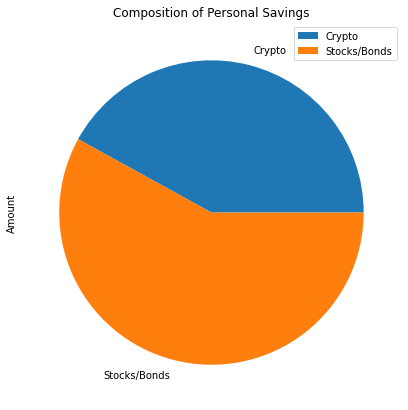

In [19]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings", figsize=(15,7))

In [20]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_psavings = total_crypto_value + total_sb_value
total_psavings

# Validate saving health
if total_psavings > emergency_fund:
    print(f"Congradulations!! You have enough money in your savings")
elif total_psavings < emergency_fund:
    print(f"There is not enough money in your savings at this time")

Congradulations!! You have enough money in your savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2015-12-04", tz="America/Chicago").isoformat()
end_date = pd.Timestamp("2020-12-04", tz="America/Chicago").isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG

# Get current closing prices for SPY and AGG
df_port = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_port.head(10)

AGG                                         SPY  \
                             open    high       low   close   volume     open   
time                                                                            
2015-12-04 00:00:00-05:00  108.05  108.30  108.0000  108.24  2058997  206.080   
2015-12-07 00:00:00-05:00  108.30  108.58  108.2300  108.41  1939914  209.220   
2015-12-08 00:00:00-05:00  108.59  108.60  108.3700  108.45  2159181  206.480   
2015-12-09 00:00:00-05:00  108.34  108.58  108.2100  108.45  2570279  206.190   
2015-12-10 00:00:00-05:00  108.51  108.51  108.3643  108.40  1866415  205.440   
2015-12-11 00:00:00-05:00  108.70  108.86  108.5700  108.69  1956553  203.360   
2015-12-14 00:00:00-05:00  108.53  108.58  108.1700  108.20  3159164  202.070   
2015-12-15 00:00:00-05:00  108.08  108.19  107.9111  108.18  2715340  204.700   
2015-12-16 00:00:00-05:00  108.12  108.27  107.9300  108.02  2740743  206.365   
2015-12-17 00:00:00-05:00  108.24  108.30  108.0201  108.15  3828504  208.400   

                                                                
                             high       low   close     volume  
time                                                            
2015-12-04 00:00:00-05:00  209.97  205.9300  209.63  138261490  
2015-12-07 00:00:00-05:00  209.25  207.2000  208.29   80571904  
2015-12-08 00:00:00-05:00  208.04  205.7800  206.96   85182207  
2015-12-09 00:00:00-05:00  208.68  204.1800  205.36  130361762  
2015-12-10 00:00:00-05:00  207.43  205.1400  205.82   87012644  
2015-12-11 00:00:00-05:00  204.14  201.5100  201.85  153723143  
2015-12-14 00:00:00-05:00  203.05  199.9500  202.99  147606862  
2015-12-15 00:00:00-05:00  206.11  202.8666  205.09  113374768  
2015-12-16 00:00:00-05:00  208.39  204.8000  207.98  145603746  
2015-12-17 00:00:00-05:00  208.48  204.8400  204.89  123942014

In [23]:
# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_weighty_dist = MCSimulation(
    portfolio_data = df_port,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Print the simulation input data
MC_weighty_dist.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-12-04 00:00:00-05:00  108.05  108.30  108.0000  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.58  108.2300  108.41  1939914   
2015-12-08 00:00:00-05:00  108.59  108.60  108.3700  108.45  2159181   
2015-12-09 00:00:00-05:00  108.34  108.58  108.2100  108.45  2570279   
2015-12-10 00:00:00-05:00  108.51  108.51  108.3643  108.40  1866415   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-12-04 00:00:00-05:00          NaN  206.08  209.97  205.93  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.20  208.29   
2015-12-08 00:00:00-05:00     0.000369  206.48  208.04  205.78  206.96   
2015-12-09 00:00:00-05:00     0.000000  206.19  208.68  204.18  205.36   
2015-12-10 00:00:00-05:00    -0.000461  205.44  207.43  205.14  205.82   

                                                   
                              volume daily_return  
time                                               
2015-12-04 00:00:00-05:00  138261490          NaN  
2015-12-07 00:00:00-05:00   80571904    -0.006392  
2015-12-08 00:00:00-05:00   85182207    -0.006385  
2015-12-09 00:00:00-05:00  130361762    -0.007731  
2015-12-10 00:00:00-05:00   87012644     0.002240

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_weighty_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993240,1.003947,1.002011,1.010589,1.016897,1.015572,0.997095,1.007515,1.004921,1.006022,...,1.000163,0.996400,0.999436,0.986588,1.005221,0.996089,0.997236,1.005233,0.999691,0.993414
2,0.988061,1.005148,0.998948,1.009544,1.021397,1.028096,0.997262,1.012299,1.001708,1.007765,...,1.001649,1.008024,1.004946,0.985498,1.013620,0.987259,1.000814,1.002621,0.998486,0.997039
3,0.994275,1.006164,1.003784,1.003593,1.018151,1.015946,1.002994,1.013997,1.007589,1.000441,...,1.005028,0.993189,1.009812,0.988243,1.020737,0.996609,0.990220,0.998971,1.000392,1.013552
4,0.997368,1.018740,1.016217,1.014515,1.026195,1.024768,1.007740,1.012218,1.003114,1.009432,...,0.992325,0.987961,1.021898,0.996613,1.027879,0.988690,0.986335,1.007962,0.989388,1.005777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.544346,7.625283,30.165051,17.569656,13.784198,3.941952,6.717291,13.156315,1.164213,8.092337,...,7.164183,8.409740,9.957349,13.094506,4.178493,10.557405,12.991653,20.676982,17.958699,23.065077
7557,10.561697,7.480958,29.962973,17.581330,13.845983,3.943771,6.680874,13.194431,1.176007,8.134779,...,7.180145,8.374826,10.049289,13.055160,4.183784,10.553630,13.054729,20.412042,17.967694,22.933592
7558,10.566505,7.561076,30.201738,17.467137,13.648063,3.965058,6.699684,13.205925,1.173618,8.096761,...,7.149304,8.473541,10.092769,13.004986,4.169013,10.599723,13.183366,20.265411,17.850397,23.234694
7559,10.571564,7.571889,30.376319,17.808097,13.645364,3.956308,6.706748,13.317824,1.172996,8.039267,...,7.108543,8.597952,10.042464,12.925437,4.193403,10.579308,13.170575,20.130928,17.857570,23.213691


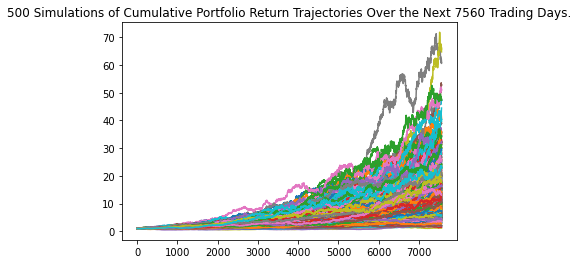

In [25]:
# Plot simulation outcomes
port_line_plot = MC_weighty_dist.plot_simulation()

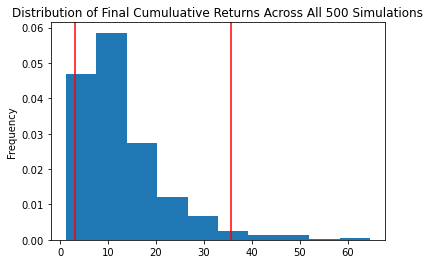

In [27]:
# Plot probability distribution and confidence intervals
port_dist_plot = MC_weighty_dist.plot_distribution()

### Retirement Analysis

In [28]:
# Pull summary statistics from the Monte Carlo simulation results
port_tbl = MC_weighty_dist.summarize_cumulative_return()

# Print summary statistics
print(port_tbl)

count           500.000000
mean             12.993941
std               9.073083
min               1.170473
25%               6.911115
50%              10.375028
75%              16.479148
max              64.713116
95% CI Lower      3.166993
95% CI Upper     35.754677
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_ci_lower = round(port_tbl[8]*initial_investment,2)
port_ci_upper = round(port_tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${port_ci_lower} and ${port_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $63339.87 and $715093.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [30]:
# Set initial investment
increase_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
portint_ci_lower = round(port_tbl[8]*increase_initial_investment,2)
portint_ci_upper = round(port_tbl[9]*increase_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${increase_initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portint_ci_lower} and ${portint_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $95009.8 and $1072640.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_weighty_dist_five = MCSimulation(
    portfolio_data = df_port,
    weights = [.40,.60],
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_weighty_dist_five.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-12-04 00:00:00-05:00  108.05  108.30  108.0000  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.58  108.2300  108.41  1939914   
2015-12-08 00:00:00-05:00  108.59  108.60  108.3700  108.45  2159181   
2015-12-09 00:00:00-05:00  108.34  108.58  108.2100  108.45  2570279   
2015-12-10 00:00:00-05:00  108.51  108.51  108.3643  108.40  1866415   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-12-04 00:00:00-05:00          NaN  206.08  209.97  205.93  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.20  208.29   
2015-12-08 00:00:00-05:00     0.000369  206.48  208.04  205.78  206.96   
2015-12-09 00:00:00-05:00     0.000000  206.19  208.68  204.18  205.36   
2015-12-10 00:00:00-05:00    -0.000461  205.44  207.43  205.14  205.82   

                                                   
                              volume daily_return  
time                                               
2015-12-04 00:00:00-05:00  138261490          NaN  
2015-12-07 00:00:00-05:00   80571904    -0.006392  
2015-12-08 00:00:00-05:00   85182207    -0.006385  
2015-12-09 00:00:00-05:00  130361762    -0.007731  
2015-12-10 00:00:00-05:00   87012644     0.002240

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_weighty_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994655,1.003391,1.003026,1.004744,1.004851,0.995350,1.007651,1.004282,1.009403,0.993557,...,0.987794,1.007644,1.003948,1.003476,1.011935,1.000016,0.998348,0.984117,0.998124,1.005915
2,0.994930,1.005500,1.005454,1.011206,1.014237,0.992385,1.018978,1.008320,1.022781,1.001979,...,0.995053,0.998947,0.996771,1.021545,1.018217,1.010762,0.996399,0.975826,0.988767,1.010971
3,0.983492,1.000256,1.007086,1.016088,1.022208,0.995629,1.021495,1.008308,1.021951,1.004138,...,1.003992,1.013574,0.985454,1.024087,1.033279,0.986961,1.000258,0.969534,0.998851,1.011120
4,0.980112,1.001983,1.005865,1.009946,1.021333,0.992228,1.020810,1.002894,1.022260,1.014875,...,1.004440,1.023147,0.985503,1.028972,1.032641,0.970372,1.000247,0.967894,0.998745,1.010452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.919811,1.809399,2.688733,1.046332,1.798138,1.221730,1.448331,0.920588,1.672315,1.656021,...,1.116278,1.608544,0.906329,1.794002,1.060130,1.340434,1.294882,1.927479,1.887587,2.685723
1257,2.937821,1.826276,2.684065,1.049409,1.816057,1.234059,1.457260,0.918186,1.695033,1.658964,...,1.121249,1.591085,0.910453,1.785751,1.048425,1.337516,1.279885,1.915571,1.889182,2.679367
1258,2.945903,1.822860,2.676587,1.048087,1.824342,1.227154,1.446866,0.921196,1.683246,1.635417,...,1.133426,1.601493,0.901912,1.792351,1.065188,1.334639,1.288882,1.947732,1.899049,2.662767
1259,2.913848,1.828263,2.675264,1.049388,1.826791,1.231353,1.435835,0.926042,1.674176,1.656601,...,1.130164,1.589041,0.911213,1.778961,1.068089,1.344081,1.295161,1.965409,1.903941,2.667640


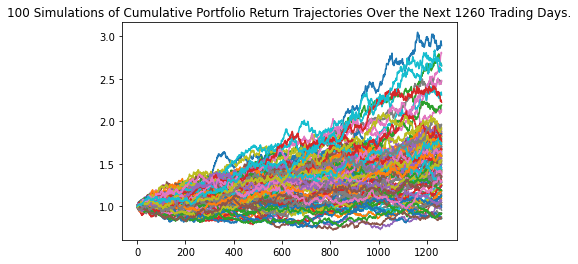

In [34]:
# Plot simulation outcomes
port_line_plot_five = MC_weighty_dist_five.plot_simulation()

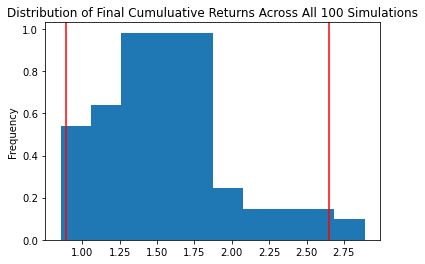

In [35]:
# Plot probability distribution and confidence intervals
port_dist_plot_five = MC_weighty_dist_five.plot_distribution()

In [36]:
# Pull summary statistics from the Monte Carlo simulation results
port_tbl_five = MC_weighty_dist_five.summarize_cumulative_return()

# Print summary statistics
print(port_tbl_five)

count           100.000000
mean              1.569089
std               0.432989
min               0.854972
25%               1.279395
50%               1.549359
75%               1.759647
max               2.890263
95% CI Lower      0.892994
95% CI Upper      2.652743
Name: 1260, dtype: float64


In [44]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(port_tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(port_tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53579.62 and $159164.57


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_weighty_dist_ten = MCSimulation(
    portfolio_data = df_port,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Print the simulation input data
MC_weighty_dist_ten.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2015-12-04 00:00:00-05:00  108.05  108.30  108.0000  108.24  2058997   
2015-12-07 00:00:00-05:00  108.30  108.58  108.2300  108.41  1939914   
2015-12-08 00:00:00-05:00  108.59  108.60  108.3700  108.45  2159181   
2015-12-09 00:00:00-05:00  108.34  108.58  108.2100  108.45  2570279   
2015-12-10 00:00:00-05:00  108.51  108.51  108.3643  108.40  1866415   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-12-04 00:00:00-05:00          NaN  206.08  209.97  205.93  209.63   
2015-12-07 00:00:00-05:00     0.001571  209.22  209.25  207.20  208.29   
2015-12-08 00:00:00-05:00     0.000369  206.48  208.04  205.78  206.96   
2015-12-09 00:00:00-05:00     0.000000  206.19  208.68  204.18  205.36   
2015-12-10 00:00:00-05:00    -0.000461  205.44  207.43  205.14  205.82   

                                                   
                              volume daily_return  
time                                               
2015-12-04 00:00:00-05:00  138261490          NaN  
2015-12-07 00:00:00-05:00   80571904    -0.006392  
2015-12-08 00:00:00-05:00   85182207    -0.006385  
2015-12-09 00:00:00-05:00  130361762    -0.007731  
2015-12-10 00:00:00-05:00   87012644     0.002240

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_weighty_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017037,0.998892,1.005789,0.997342,0.985810,0.990197,0.994448,0.989009,0.994570,0.998911,...,1.006836,1.009573,1.003840,0.997214,1.002285,0.994471,0.996082,1.004506,0.994083,0.991779
2,0.999673,0.995381,0.996743,0.986263,0.979092,1.000216,0.987674,0.975104,0.995512,1.016893,...,1.023598,1.007063,1.007368,0.994995,1.007548,0.982734,0.996434,1.006910,0.986794,0.991846
3,0.991812,0.999560,0.987393,0.979060,0.984924,1.003629,1.010233,0.987782,0.989161,1.013712,...,1.014188,0.996723,1.002872,1.004218,0.988741,0.988794,1.006801,1.003760,0.983328,0.993343
4,0.996339,1.002056,0.996717,0.989094,0.977674,1.005850,1.015741,0.980682,0.992703,1.003778,...,1.008896,0.985506,1.003116,1.011067,0.991980,0.983926,1.001656,1.007443,0.986325,0.993395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.620982,2.751165,2.208694,2.029833,2.425274,2.364522,3.706166,1.188085,2.030584,2.963657,...,1.700338,3.286122,2.457331,1.653965,3.244659,1.800803,0.927247,2.010180,2.329853,1.590291
2517,1.626486,2.741781,2.211601,2.038489,2.398993,2.356558,3.727067,1.177988,2.033311,2.994056,...,1.733160,3.308199,2.468954,1.657956,3.241845,1.789069,0.918635,1.981983,2.350355,1.577722
2518,1.625133,2.742712,2.194353,2.043834,2.389875,2.374055,3.725053,1.171306,2.015314,2.967005,...,1.740170,3.339653,2.462564,1.652578,3.227009,1.764142,0.918589,1.953259,2.346118,1.589783
2519,1.642217,2.741849,2.203080,2.052212,2.386910,2.408502,3.786884,1.183203,2.018755,2.967421,...,1.733930,3.354964,2.472724,1.646108,3.217300,1.779538,0.917103,1.960750,2.354893,1.612380


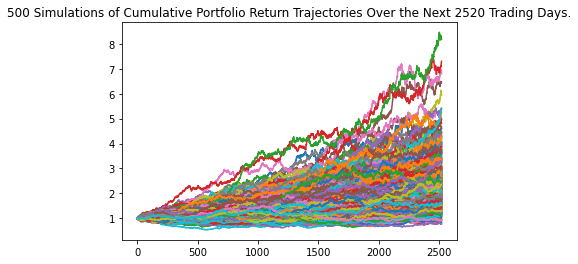

In [40]:
# Plot simulation outcomes
port_line_plot_ten = MC_weighty_dist_ten.plot_simulation()

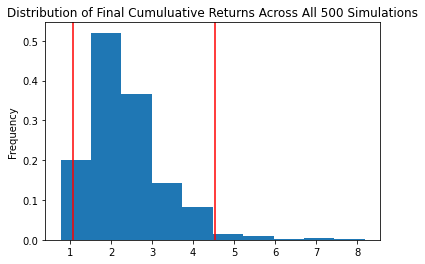

In [41]:
# Plot probability distribution and confidence intervals
port_dist_plot_ten = MC_weighty_dist_ten.plot_distribution()

In [42]:
# Pull summary statistics from the Monte Carlo simulation results
port_tbl_ten = MC_weighty_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(port_tbl_ten)

count           500.000000
mean              2.373544
std               0.963445
min               0.768317
25%               1.740794
50%               2.187623
75%               2.801512
max               8.185589
95% CI Lower      1.079802
95% CI Upper      4.528627
Name: 2520, dtype: float64


In [45]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(port_tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(port_tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64788.09 and $271717.59
